# BENG123 Final Project: Construction Template
## Module Rubric  (20 total points)
<font color='red'>**IMPORTANT NOTES:**</font>  
* **The IPYNB files must run from top to bottom without errors. We will run your notebook using the following steps: $$\text{"Kernel}\ \rightarrow\ \text{Restart and Run all"}$$**
* **Make sure you are using the correct (most recent) version of masspy
<font color='red'>(version>=0.1.0b3)</font>**
* **Do not leave unneccessary code/comments in the final notebook submission.**

#### Part 1: Formation of RBC Model (9 points)
1.	Form the RBC network correctly by integrating the glycolysis, pentose phosphate pathway, AMP metabolism, and hemoglobin modules. Display the correct model overview.
2.	Define the steady state. Display the correct steady state flux map, PERCs values, and the equilibrium constants in an organized DataFrame.
3.	Graphically verify that the model is in steady state.

#### Part 2: Enzyme Module Construction (27 points) 
4.	Metabolites and reactions defined such that the module mechanism is correctly reconstructed.
5.	Enzymatic reaction rates are defined correctly.
6.	Steady state enzyme concentrations symbolically determined correctly.
7.	Numerical values (including equilibrium constants) correctly defined, displayed, and substituted into equations.
8.	Extract and display the enzyme symbolically in terms of enzyme species and in terms of the rate constants.
9.	Determine rate constants correctly with an optimization Error less than 1e-6. Numerical values of the rate constants are displayed.
10.	Module initial conditions correctly set and are displayed.
11.	Reconstructed enzyme module passes a quality control and assurance check.
12.	Module is added to the RBC to form the base model and steady state can be reached.

#### Part 3: Simulation Case Studies (12 points)
13.	Case is correctly introduced.
14.	Modified model is correctly set up to explore case study.
15.	Graphical verification that the modified model can reach a steady state.
16.	Models can be exported/imported without issue.

#### Organization (2 points)
17.	Proper submission of all project files (report .pdf, project construction.iPYNB, separate iPYNB with code for all figures generated for text, individual image files of figures).
18.	iPython notebooks run without any TA assistance, are well organized and clear to follow.

Be sure to include print or sym.pprint statements where necessary to display steps that match up to this rubric.

## Import Packages & Set Globals

In [1]:
from os import path
from os.path import join

import matplotlib.pyplot as plt

from scipy import optimize

import sympy as sym

import pandas as pd
pd.set_option("display.max_columns", 999)

import numpy as np

from cobra import DictList

from mass.util.matrix import matrix_rank
from mass import MassMetabolite, Simulation, UnitDefinition, strip_time
from mass.enzyme_modules import EnzymeModule
from mass.io import json, sbml
from mass.util import Keq2k, k2Keq, strip_time, qcqa_model
import mass.test
from mass.test import create_test_model

from sympy import Eq, Symbol, lambdify, simplify, solveset

## Part 3: Add Enzymes to the RBC Model

### 1. Load RBC Model and Enzymes

In [2]:
from mass.io import json

#set variable to a string of the model's identifier
RBC_MODEL_ID = "RBC"
MODULE_1_ID = "PGI"
MODULE_2_ID = "PGK"
MODULE_3_ID ="GND"

models = []
for model_id, model_type in zip([RBC_MODEL_ID, MODULE_1_ID, MODULE_2_ID, MODULE_3_ID], ["RBC", "PGI", "PGK", "GND"]):
    filepath = "../models/{0}_{1}.json".format(model_id, model_type)
    models.append(json.load_json_model(filepath))
    print("Loaded {0} Model with ID: {1}".format(model_type, model_id))
core_rbc, PGI, PGK, GND = models

Loaded RBC Model with ID: RBC
Loaded PGI Model with ID: PGI
Loaded PGK Model with ID: PGK
Loaded GND Model with ID: GND


### 2. Remove reactions and merge the Enzyme Module into the MassModel

In [3]:
rbc_PGI = PGI.merge(core_rbc, inplace=False)
rbc_PGI.remove_reactions([rbc_PGI.reactions.PGI])

rbc_PGI_PGK = PGK.merge(rbc_PGI, inplace=False)
rbc_PGI_PGK.remove_reactions([rbc_PGI_PGK.reactions.PGK])

rbc_PGI_PGK_GND = GND.merge(rbc_PGI_PGK, inplace=False)
rbc_PGI_PGK_GND.remove_reactions([rbc_PGI_PGK_GND.reactions.GND])

### 3. Validate steady state

C:\Users\Administrator\miniconda3\lib\site-packages\roadrunner\roadrunner.py:3946 UserWarning: Simulation requested end point (100000000.0) not reached, because the maximum number of steps reached.  Possible solutions include:
  * Setting an explicit number of points (i.e. r.simulate(0, 100000000.0, 1001)
  * Setting r.integrator.variable_step_size to 'False'
* Setting 
C:\Users\Administrator\miniconda3\lib\site-packages\roadrunner\roadrunner.py:3959 UserWarning: Simulation returned more points than max output rows specified. Try incresing the number of maximum output rows or minimum step size.


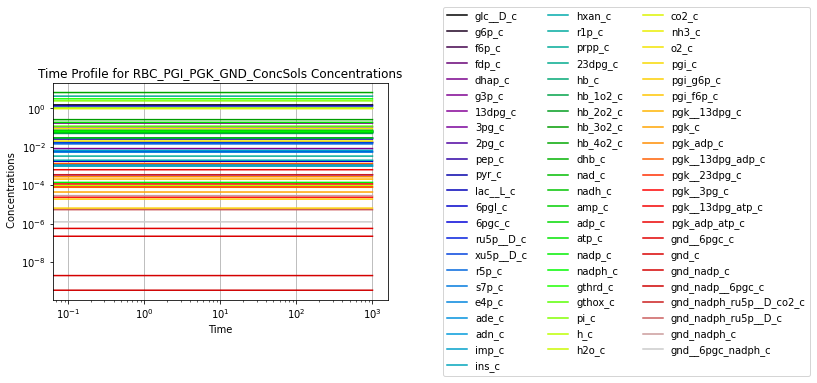

In [4]:
t0, tf = (0, 1e3)
sim_core = Simulation(rbc_PGI_PGK_GND)
sim_core.find_steady_state(
    rbc_PGI_PGK_GND, strategy="simulate",
    update_values=True)
conc_sol_ss, flux_sol_ss = sim_core.simulate(
    rbc_PGI_PGK_GND, time=(t0, tf, tf*10 + 1))
# Quickly render and display time profiles
conc_sol_ss.view_time_profile()

## Export Model
To assist in the export/import process, some code and instructions have been provided for you. Please keep in mind that the code assumes that the model objects will be exported/imported from the same directory where this notebook exits. Uncomment the code to use it.

### Set Models
* Set the variable ``INTEGRATED_MODEL`` to your current base model object in order to export it to the current directory.

Uncomment the code below when you are ready to export the models to use in your project analysis IPYNB file:

In [5]:
INTEGRATED_MODEL = rbc_PGI_PGK_GND

### Export Models

Uncomment the code below when you are ready to export the models to use in your project analysis IPYNB file:

In [6]:
from mass.io import json
for model, model_type in zip([INTEGRATED_MODEL], ["INTEGRATED"]):
    filepath = "../models/{0}_{1}.json".format(model.id, model_type)
    json.save_json_model(model, filepath)
    print("Saved {0} Model with ID: {1}".format(model_type, model.id))

Saved INTEGRATED Model with ID: RBC_PGI_PGK_GND
